---
### Project Catenaria - First exploration 13.4.24

- Datos: JSON nube puntos ordenados.

#### Obiettivi:
1. Dar una nota a cada VANO --> definir criterios juntos
    - Hay que definir una métrica para evaluar el estado del vano:
    
        1. Nota por clasificación = Proporcion de puntos bien clasificados (2 categorias) - Accuracy?
        2. Nota por consistencia de puntos = Referencia Catenaria, Bézier, C-spline... - RMSE? + Correlation? - Likelyhood?

2. Calcular una formula que interpole los los puntos conductores---> puntos azul clarito.

    - Interpolación por ajuste de Catenaria, Bezier, C-spline
    - Interpolacion con modelo de Machine Learning/DL - Regression... - Autoencoder?


3. Reclasificar, clasificar mejor los puntos del conductor y de los palos

    - Explorar opciones: Reetiquetado, utilizar resultados del ajuste de conductor, clusterizar puntos bien clasificados?, sistema de reglas?

4. Distancia cadenaria a suelo. Distancia Minima. Nos pasan la nube de puntos del suelo.

    - Es necesario definir el suelo y (ajustar los puntos con una interpolacion?)
    - Distancia del conductor más cercano al suelo o para cada conductor?
    - Distancia de referencia = Disancia 2D entre apoyos/Distancia 3D conductor (recalculado)
----

In [9]:
from modules import *
import json
import plotly.graph_objects as go
import numpy as np

# Obtenemos datos json con 25 elementos = vanos

path = "../data/"

with open(path+'vanos.json', 'r') as archivo:
    data = json.load(archivo)
    
len(data)
data.remove(data[2])

In [10]:
# Mostramos las keys del primer elemento
print (len(data))

chiavi_primo_elemento = data[0].keys()

print (chiavi_primo_elemento)

24
dict_keys(['OBJECTID_VANO_2D', 'ID_VANO', 'LONGITUD_2D', 'COORDENADA_X_INICIO', 'COORDENADA_Y_INICIO', 'COORDENADA_X_FIN', 'COORDEANDA_Y_FIN', 'APOYOS', 'CONDUCTORES', 'LIDAR'])


In [11]:
# Desplegamos la estructura de datos para un elemento (listas, diccionaros, n elementos...)

element = data[19]
print_element(element)


OBJECTID_VANO_2D: 24

ID_VANO: C_13417192_13417205

LONGITUD_2D: 72.58751804450998

COORDENADA_X_INICIO: 382690.56599999964

COORDENADA_Y_INICIO: 4460723.941

COORDENADA_X_FIN: 382719.3420000002

COORDEANDA_Y_FIN: 4460657.301000001

APOYOS: 
- Length of list: 2
    OBJECTID_APOYO_3D: 16
    COD_APOYO: 13417192
    COORDENADA_X: 382690.56599999964
    COORDEANDA_Y: 4460723.941
    COORDENADAS_Z: [630.6414999999979, 639.402900000001]
    - Length of list: 2

CONDUCTORES: 
- Length of list: 3
    OBJECTID_VANO_3D: 59
    LONGITUD_2D: 11.530279810344998
    LONGITUD_3D: 11.641450833329856
    VERTICES: [[382700.44350000005, 4460702.833799999, 635.9636000000028], [382695.9519999996, 4460713.453299999, 637.5685999999987]]
    - Length of list: 2

LIDAR: 
    CONDUCTORES: [[382721.1963, 4460649.7758, 630.0131], [382721.7463, 4460650.8581, 630.0416], [382720.8911, 4460650.434, 629.9966], [382721.1682, 4460649.7024, 629.9904], [382721.9936, 4460650.2236, 630.0563], [382721.9597, 4460650.615, 6

Notamos que: 

1. Existen datos de apoyos y conductores junto con otros datos de "LIDAR". Los primeros pueden ser complementarios para procesar los segundos y comparar.
2. Los datos LIDAR contienen todos los elementos y se usaran como base.
3. Como se calcula la distancia 2D y 3D.

In [12]:
#Número de puntos conductores:
numero_punti = len(data[0]['LIDAR']['CONDUCTORES'])
print("Numero di punti conductores:", numero_punti)

#Número de puntos de apoyo:
numero_punti = len(data[0]['LIDAR']['APOYOS'])
print("Numero di punti apoyos:", numero_punti)

Numero di punti conductores: 4612
Numero di punti apoyos: 1186


In [13]:
# Realizamos una visualización 3D de varios conductores
for i in range(25)[17:20]:
    
    print("Vano:", i)
    
    cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)
    
    plot_data(cond_values, apoyo_values, vert_values, extremos_values)

Vano: 17


Vano: 18


Vano: 19


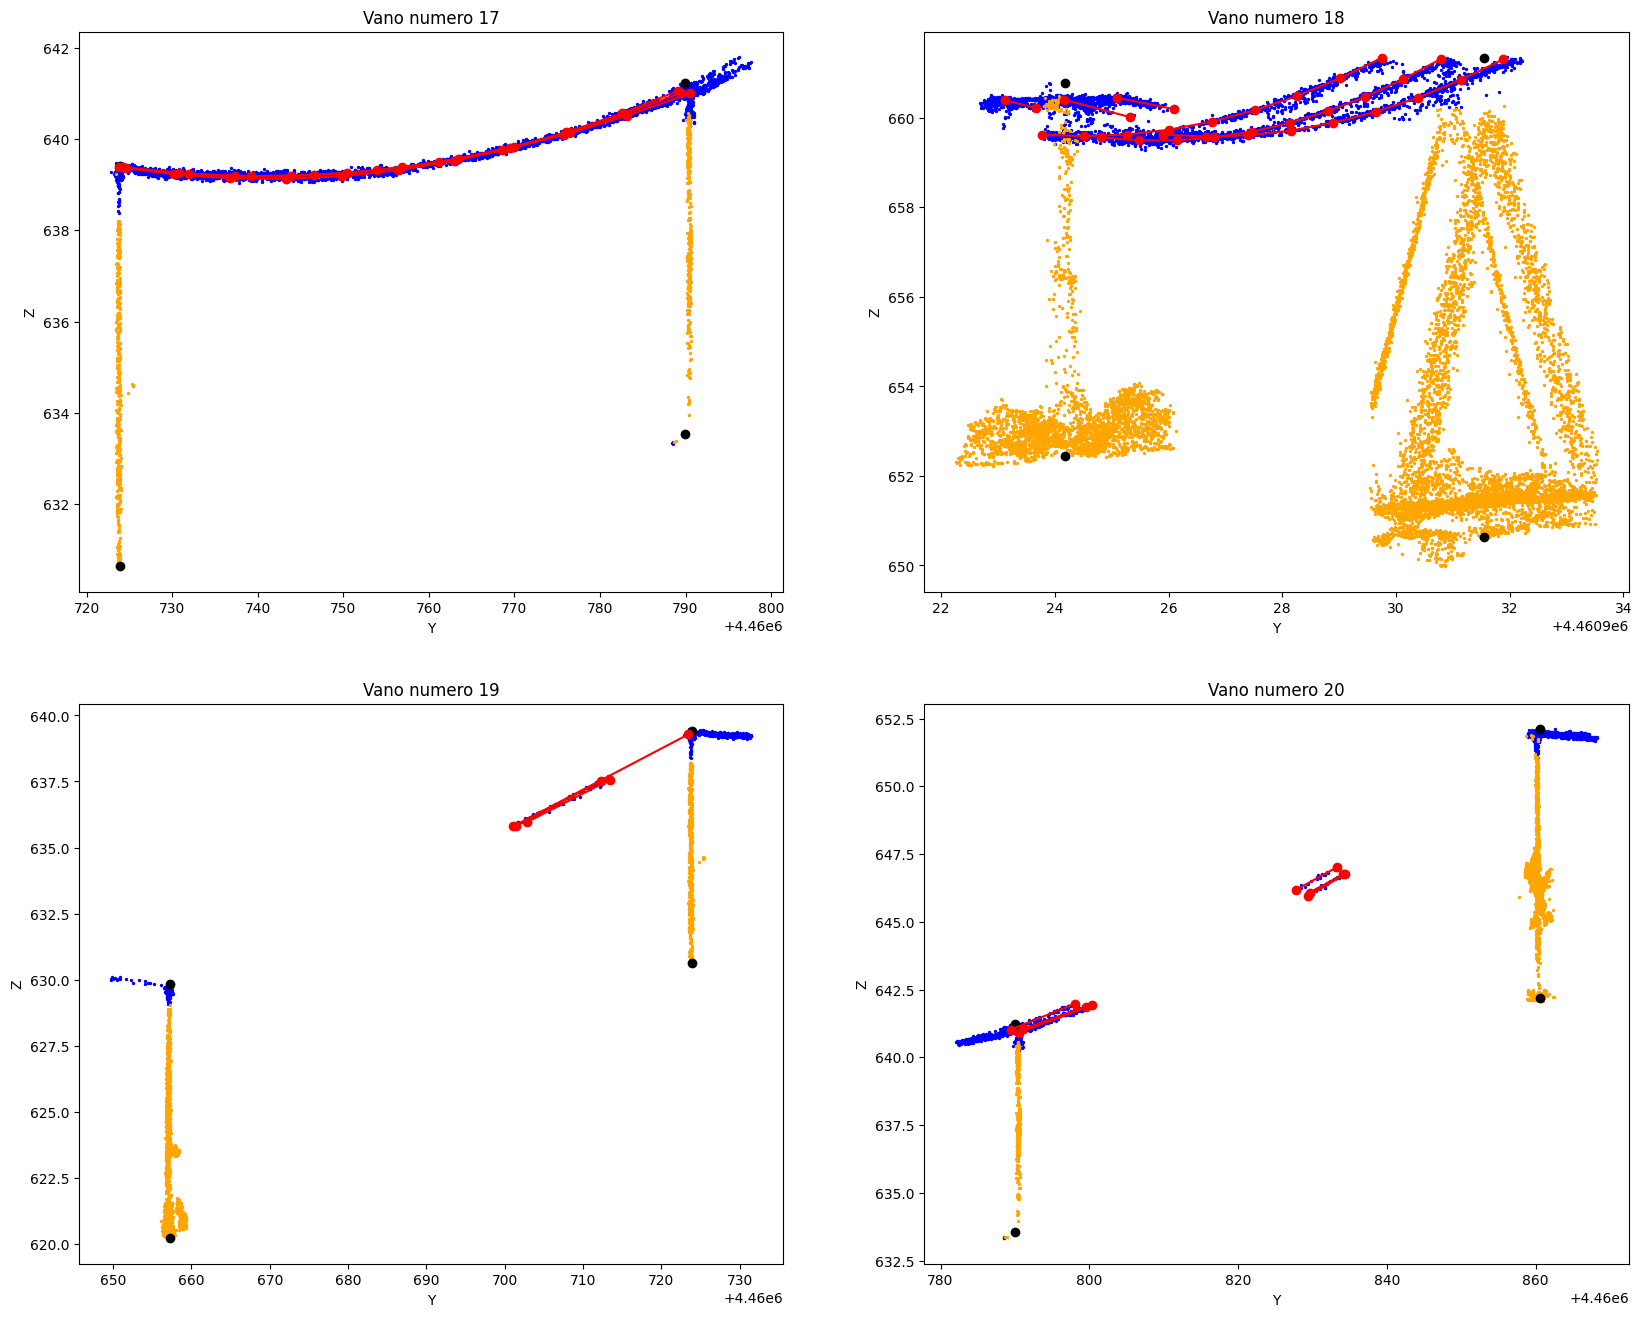

In [14]:
# Crea un grafico 2D
plt.figure(figsize=(20, 16))

j = 0

for i in range(25)[17:21]:
    
    j += 1
    
    cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)

    plt.subplot(2,2, j)

    plt.scatter(cond_values[1], cond_values[2], color='blue', s = 2)
    plt.scatter(apoyo_values[1], apoyo_values[2], color='orange', s = 2)
    plt.scatter(extremos_values[1], extremos_values[2], color='black')
    
    for vert in vert_values:
        plt.plot(vert[1], vert[2],"-o", color='red')

    # Etichette degli assi
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.title(f'Vano numero {i}')

# Mostra il grafico
plt.show()

In [15]:
x_apoyos_distance, y_apoyos_distance, xz_distance, xy_distance, yz_distance, D3_apoyos_distance = get_distances(extremos_values)

print(x_apoyos_distance, y_apoyos_distance)
print(xz_distance, xy_distance, yz_distance)
print(D3_apoyos_distance)

31.096000000834465 70.60400000028312
32.27528130151313 77.14846746431115 71.13126867334707
77.63129909470653


Distancia x e y: (28.943999999202788, 66.00300000049174)
Distancia xz, xy e yz: (29.089187050240607, 72.07045958656545, 66.06679707958413)
Distancia 3D: 72.12889027504026


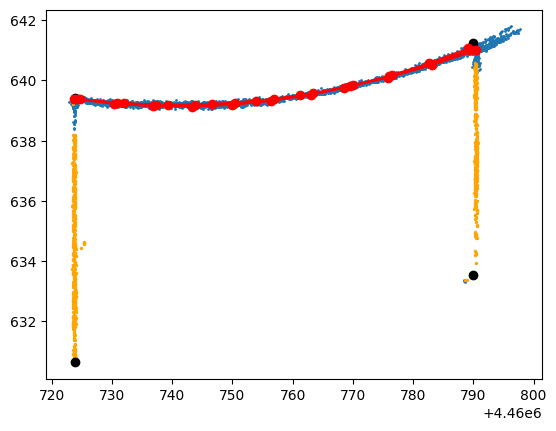

Distancia x e y: (0.0, 72.07045958656818)
Distancia xz, xy e yz: (2.902700000006007, 72.07045958656818, 72.12889027504299)
Distancia 3D: 72.12889027504299


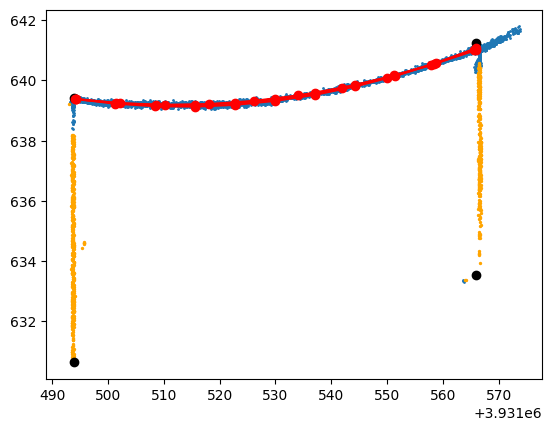

In [17]:
cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, 17)

plt.scatter(np.array(cond_values)[1], np.array(cond_values)[2], s = 1)
plt.scatter(apoyo_values[1], apoyo_values[2], color='orange', s = 2)
plt.scatter(extremos_values[1], extremos_values[2], color='black')

for vert in vert_values:
    plt.plot(vert[1], vert[2],"-o", color='red')

x_apoyos_distance, y_apoyos_distance, xz_distance, xy_distance, yz_distance, D3_apoyos_distance = get_distances(extremos_values)

print(f"Distancia x e y: {x_apoyos_distance, y_apoyos_distance}")
print(f"Distancia xz, xy e yz: {xz_distance, xy_distance, yz_distance}")
print(f"Distancia 3D: {D3_apoyos_distance}")

plt.show()

rotated_conds, rotated_apoyos, rotated_vertices, rotated_extremos = rotate_vano(cond_values, extremos_values, apoyo_values, vert_values)

plt.scatter(rotated_conds[1], rotated_conds[2], s = 1)
plt.scatter(rotated_apoyos[1], rotated_apoyos[2], color='orange', s = 2)
plt.scatter(rotated_extremos[1], rotated_extremos[2], color='black')
    
for vert in rotated_vertices:
    plt.plot(vert[1], vert[2],"-o", color='red')

x_apoyos_distance, y_apoyos_distance, xz_distance, xy_distance, yz_distance, D3_apoyos_distance = get_distances(rotated_extremos)

print(f"Distancia x e y: {x_apoyos_distance, y_apoyos_distance}")
print(f"Distancia xz, xy e yz: {xz_distance, xy_distance, yz_distance}")
print(f"Distancia 3D: {D3_apoyos_distance}")

Número de puntos después de eliminar los extremos: 1638 vs 1333


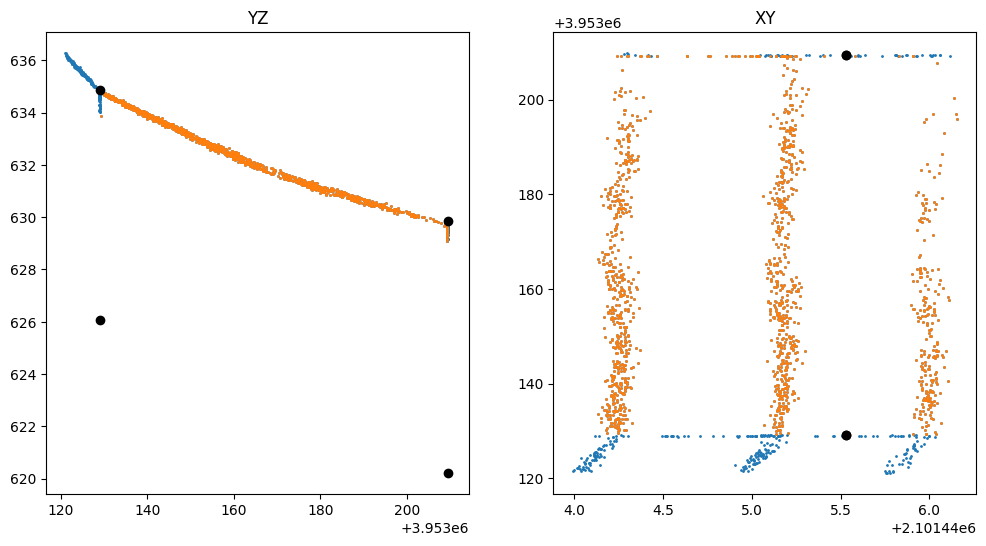

In [20]:
cropped_conds = clean_outliers(rotated_conds, rotated_extremos)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.scatter(rotated_conds[1], rotated_conds[2], s = 1, label = "Original Conductors")
plt.scatter(cropped_conds[1], cropped_conds[2], s = 1, label = "Cropped Conductors")

plt.scatter(rotated_extremos[1], rotated_extremos[2], color='black')
plt.title("YZ")

plt.subplot(122)
plt.scatter(rotated_conds[0], rotated_conds[1], s = 1, label = "Original Conductors")
plt.scatter(cropped_conds[0], cropped_conds[1], s = 1, label = "Cropped Conductors")

plt.scatter(rotated_extremos[0], rotated_extremos[1], color='black')
plt.title("XY")

plt.show()

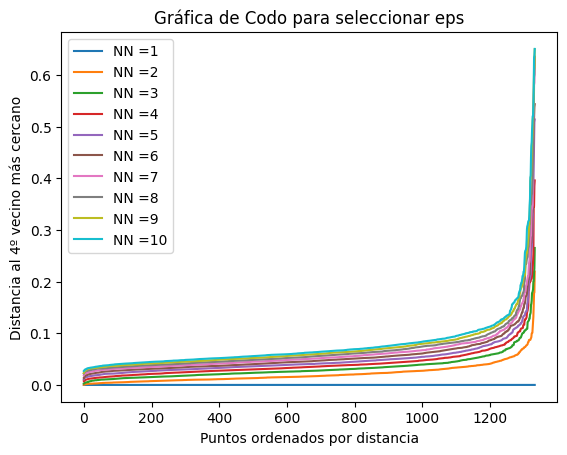

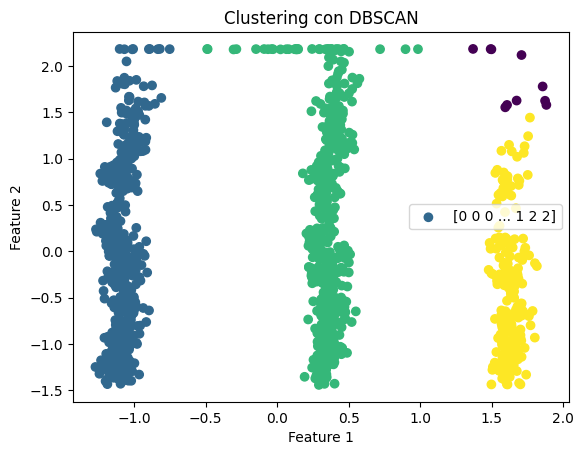

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Generar datos de ejemplo (reemplaza esto con tus datos reales)
np.random.seed(0)
X = scale_conductor(cropped_conds[0:2,:]).T   # Ejemplo de datos aleatorios

# Calcular las distancias a los vecinos más cercanos para determinar eps
k = 10
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)

distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)

for k in range(k):
    # Ordenar las distancias para la gráfica de codo
    plt.plot(distances[:,k], label = "NN =" + str(k+1))
    
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al 4º vecino más cercano')
plt.title('Gráfica de Codo para seleccionar eps')
plt.legend()
plt.show()

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=20)  # Ajusta eps y min_samples según tus datos
labels = dbscan.fit_predict(X)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label = labels)
plt.title('Clustering con DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


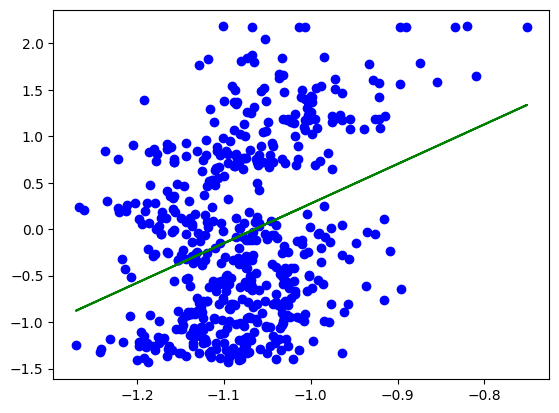

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ajuste lineal sobre los puntos 
lr = LinearRegression()
lr.fit(conductor[:, 0].reshape(-1,1), conductor[:, 1].reshape(-1,1))
line = lr.predict(conductor[:, 0].reshape(-1,1))

print(lr.intercept_)
print(lr.coef_)

plt.plot(conductor[:,0], line, color = "green")
plt.scatter(conductor[:,0], conductor[:,1], color = "blue")

np.linalg.norm(conductor - )
# Rectangulo de radio maximo
# Def linalg.norm
# Calcular distancia de los puntos
# Obtener puntos mas lejanos
# Definir dos nuevas rectas sobre esos puntos
# ax + b - max()
# Definir dx
# Calcular densidad global
# Calcular densidad por dx
# Histograma

In [205]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit

def fit_and_plot(function, data, initial_params):

    # Preparazione dei dati (assumendo che filtered_x_vals e filtered_y_vals siano già definiti)
    y_vals = data[1].reshape(-1, 1)  # Reshape per il fitting dello scaler
    z_vals = data[2].reshape(-1, 1) 

    # Normalizzazione dei valori di x e y
    scaler_y = StandardScaler()
    scaler_z = StandardScaler()

    y_vals_scaled = scaler_y.fit_transform(y_vals).flatten()
    z_vals_scaled = scaler_z.fit_transform(z_vals).flatten()  # Flatten per curve_fit

    # Fitting della catenaria ai dati normalizzati
    parametri_ottimizzati, _ = curve_fit(function, y_vals_scaled.flatten(), z_vals_scaled, p0=initial_params, method = 'lm')

    # Calcolo dei valori y fittati sui dati normalizzati
    fitted_z_vals_scaled = function(y_vals_scaled.flatten(), *parametri_ottimizzati)

    # De-normalizzazione dei valori y fittati per il plot
    fitted_z_vals = scaler_z.inverse_transform(fitted_z_vals_scaled.reshape(-1, 1)).flatten()

    # Visualizzazione dei risultati
    plt.figure(figsize=(10, 6))
    plt.scatter(scaler_y.inverse_transform(y_vals_scaled.reshape(-1,1)).flatten(), z_vals, label='Conductor', s=1)
    plt.plot(scaler_y.inverse_transform(y_vals_scaled.reshape(-1,1)).flatten(), fitted_z_vals, "-o", linewidth=1, markersize = 2 , color='red', label='Catenaria')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Catenaria vs Conductor original')

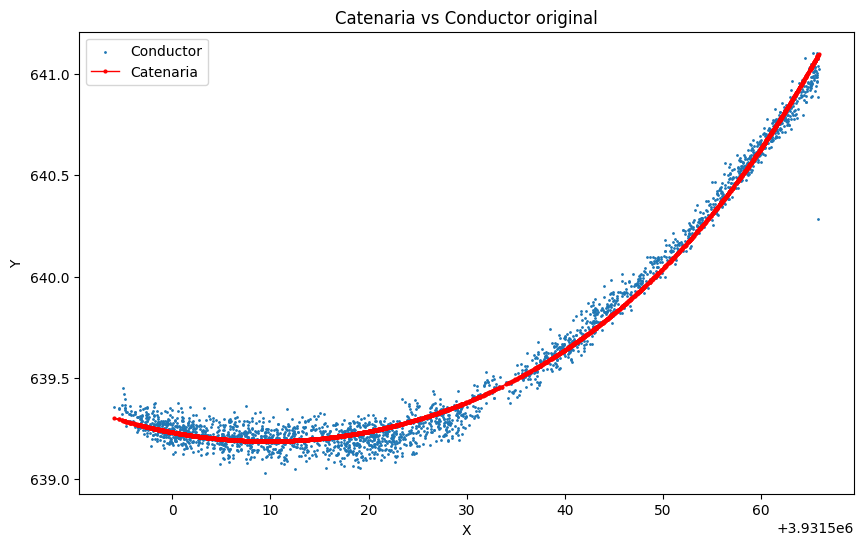

In [ ]:
# Definizione della funzione della catenaria
def catenaria(x, a, h, k):
    return a * np.cosh((x - h) / a) + k

# Parametri iniziali per il fitting
parametri_iniziali = [1, 0, 0]  # a, h, k

data = cropped_conds

fit_and_plot(catenaria, data, parametri_iniziali)

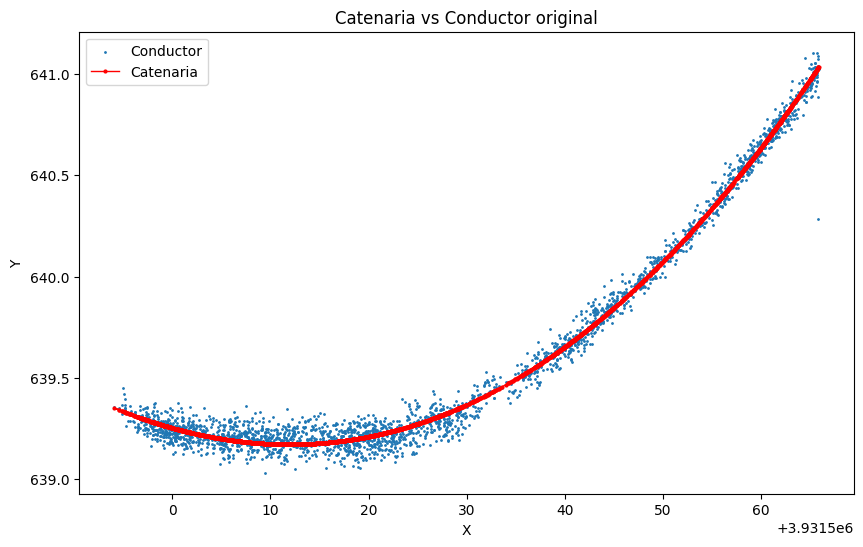

In [ ]:
# Definizione della funzione della catenaria
def pol(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

# Parametri iniziali per il fitting
parametri_iniziali = [0, 1, 1, 1]  # a, h, k

data = cropped_conds

fit_and_plot(pol, data, parametri_iniziali)

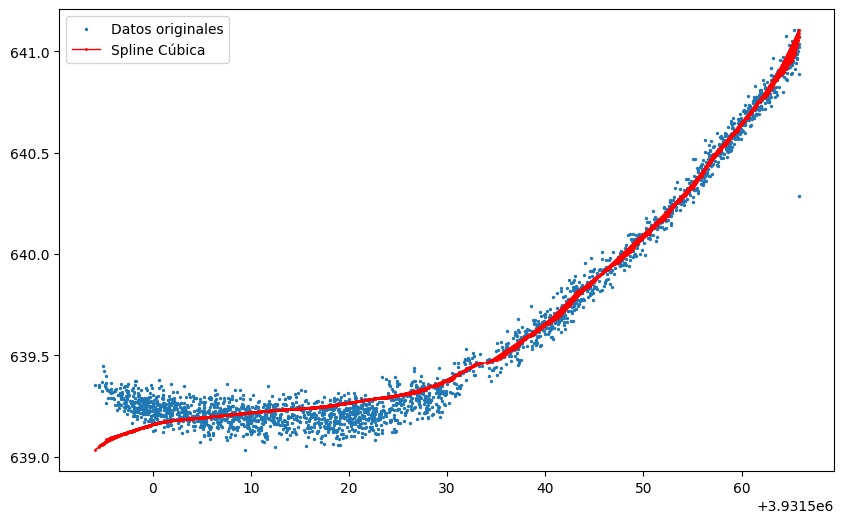

In [ ]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(np.sort(cropped_conds[1]), np.sort(cropped_conds[2]))

x_fine = cropped_conds[1]
y_fine = cs(x_fine)

plt.figure(figsize=(10, 6))
plt.scatter(x_fine, cropped_conds[2], label='Datos originales', s = 2)
plt.plot(x_fine, y_fine, "-o", linewidth=1, markersize = 1 , label='Spline Cúbica', color = "red")
plt.legend()
plt.show()

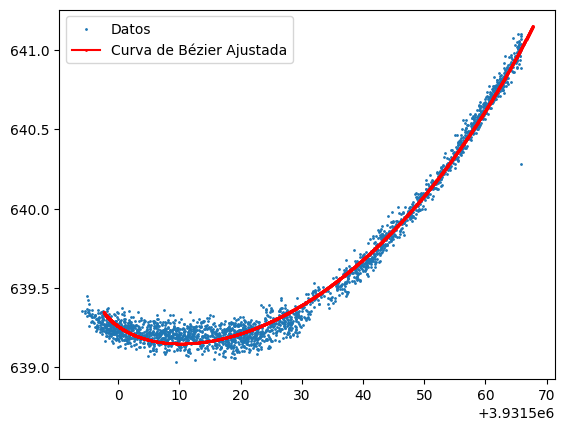

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función de la curva de Bézier cúbica
def bezier(t, p0x, p0y, p1x, p1y, p2x, p2y, p3x, p3y):
    # Asegúrate de que 't' es un array de NumPy y tiene la forma correcta
    t = np.array(t).reshape(-1, 1)
    
    # Calcula cada término de la curva de Bézier
    term0 = (1-t)**3 * np.array([p0x, p0y])
    term1 = 3 * (1-t)**2 * t * np.array([p1x, p1y])
    term2 = 3 * (1-t) * t**2 * np.array([p2x, p2y])
    term3 = t**3 * np.array([p3x, p3y])
    
    # Suma los términos para obtener los puntos de la curva
    curve = term0 + term1 + term2 + term3
    
    return curve.squeeze()

# Tus puntos de datos
x_data = cropped_conds[1] # Reemplaza con tus valores de x
y_data = cropped_conds[2]  # Reemplaza con tus valores de y
t_values = np.linspace(0, 1, len(x_data))  # Valores de t correspondientes

# Aplanar los datos para curve_fit
data = np.concatenate((x_data, y_data))

# Función objetivo para curve_fit
def objective(t, p0x, p0y, p1x, p1y, p2x, p2y, p3x, p3y):
    curve = bezier(t, p0x, p0y, p1x, p1y, p2x, p2y, p3x, p3y)
    return np.concatenate((curve[:, 0], curve[:, 1]))

# Puntos de control iniciales (estimación)
initial_guess = [1, 1, 1, 1, 1, 1, 1, 1]

# Ajuste de la curva de Bézier a los datos
params, _ = curve_fit(objective, t_values, data, p0=initial_guess)

# Extraer los puntos de control optimizados
optimized_control_points = params.reshape(4, 2)

# Usar los puntos de control optimizados para generar la curva de Bézier
t_fine = np.linspace(0, 1, len(x_data))
bezier_curve = bezier(t_fine, *params).T

# Visualizar los resultados
plt.scatter(x_data, y_data, label='Datos', s=1)
plt.plot(bezier_curve[0, :], bezier_curve[1, :], "-o", markersize = 1, label='Curva de Bézier Ajustada', color= "red")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as ma
from scipy.stats import pearsonr

rmse(y_data,bezier_curve[1,:]), pearsonr(y_data,bezier_curve[1,:])


(0.08533152544619264, PearsonRResult(statistic=0.9883975887271925, pvalue=0.0))

In [ ]:
import open3d as o3d

pcd_o3d = o3d.geometry.PointCloud()
pcd_o3d.points = o3d.utility.Vector3dVector(cropped_conds.transpose())

# Translate the point cloud and keep the translation for later
pcd_center = pcd_o3d.get_center()
pcd_o3d.translate(-pcd_center)

nn = 500 # Local search
std_multip = 2.5 # Not very sensitive

filtered_points = pcd_o3d.remove_statistical_outlier(nb_neighbors = nn, std_ratio = std_multip)

outliers = pcd_o3d.select_by_index(filtered_points[1], invert=True)

filtered_points = filtered_points[0]

outliers.paint_uniform_color([1, 0, 0])
filtered_points.paint_uniform_color([0.6, 0.6, 0.6])

o3d.visualization.draw_geometries([filtered_points, outliers])

print(f"Outlier number, proportion: {outliers} = {int(100*np.asarray(outliers.points).shape[0]/(np.asarray(outliers.points).shape[0] + np.asarray(filtered_points.points).shape[0]))} %")

Outlier number, proportion: PointCloud with 22 points. = 0 %


Text(0.5, 1.0, 'Punti 2D Allineati con PCA')

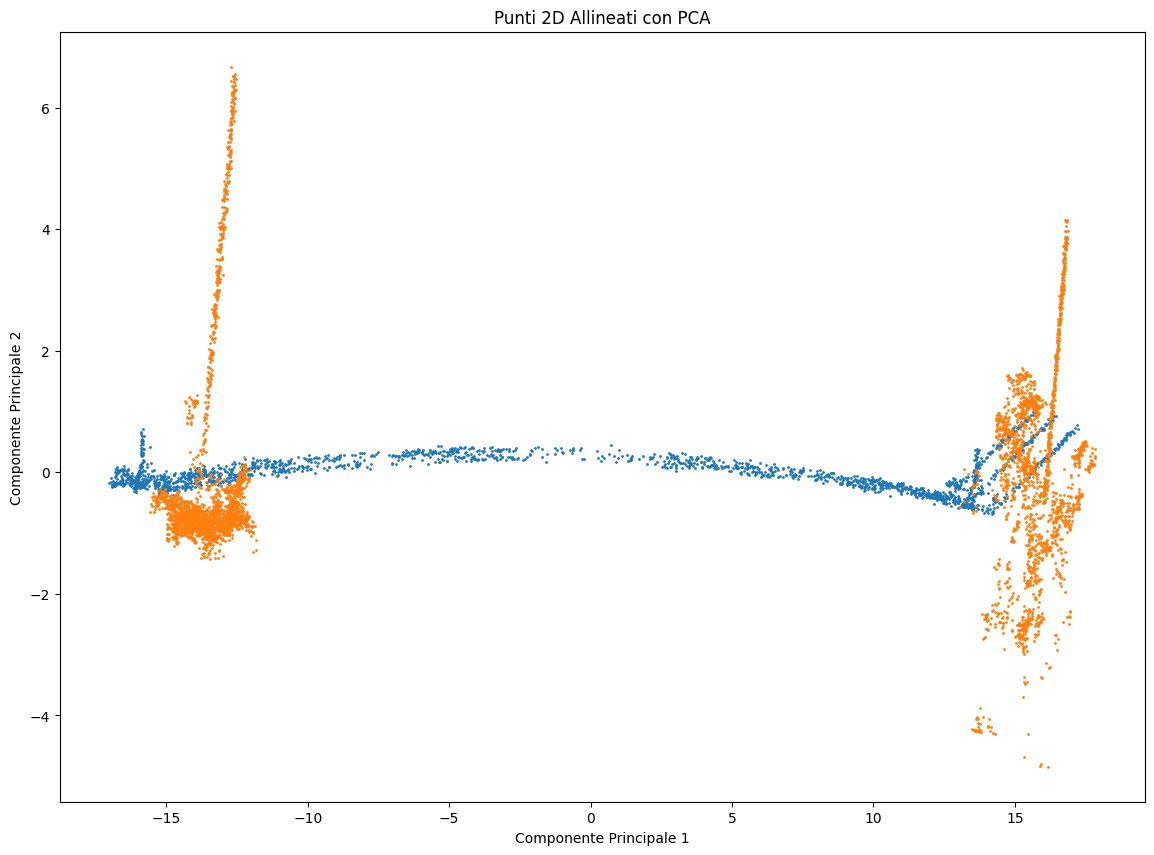

In [ ]:
# proviamo a separarli per linea

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

puntos_conductores = data[2]['LIDAR']['CONDUCTORES']
puntos_apoyos = data[2]['LIDAR']['APOYOS']

x_vals_conductores, y_vals_conductores, z_vals_conductores = get_coord(puntos_conductores)
x_vals_apoyos, y_vals_apoyos, z_vals_apoyos = get_coord(puntos_apoyos)

# Combiniamo x_vals e y_vals in un unico array 2D per PCA
data_2d_cond = np.column_stack((np.concatenate([x_vals_conductores]), np.concatenate([z_vals_conductores])))
data_2d_apo = np.column_stack((x_vals_apoyos, z_vals_apoyos))

# Applichiamo la PCA per allineare i dati lungo gli assi principali di varianza
pca = PCA(n_components=2)
data_2d_pca_cond = pca.fit_transform(data_2d_cond)
data_2d_pca_apo = pca.fit_transform(data_2d_apo)

# Visualizziamo il risultato della PCA
plt.figure(figsize=(14, 10))

plt.scatter(data_2d_pca_cond[:, 0], data_2d_pca_cond[:, 1], s=1)
plt.scatter(data_2d_pca_apo[:, 0], data_2d_pca_apo[:, 1], s=1)
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.title('Punti 2D Allineati con PCA')

Text(0.5, 1.0, 'Gráfico de puntos filtrados para min/max de PCA')

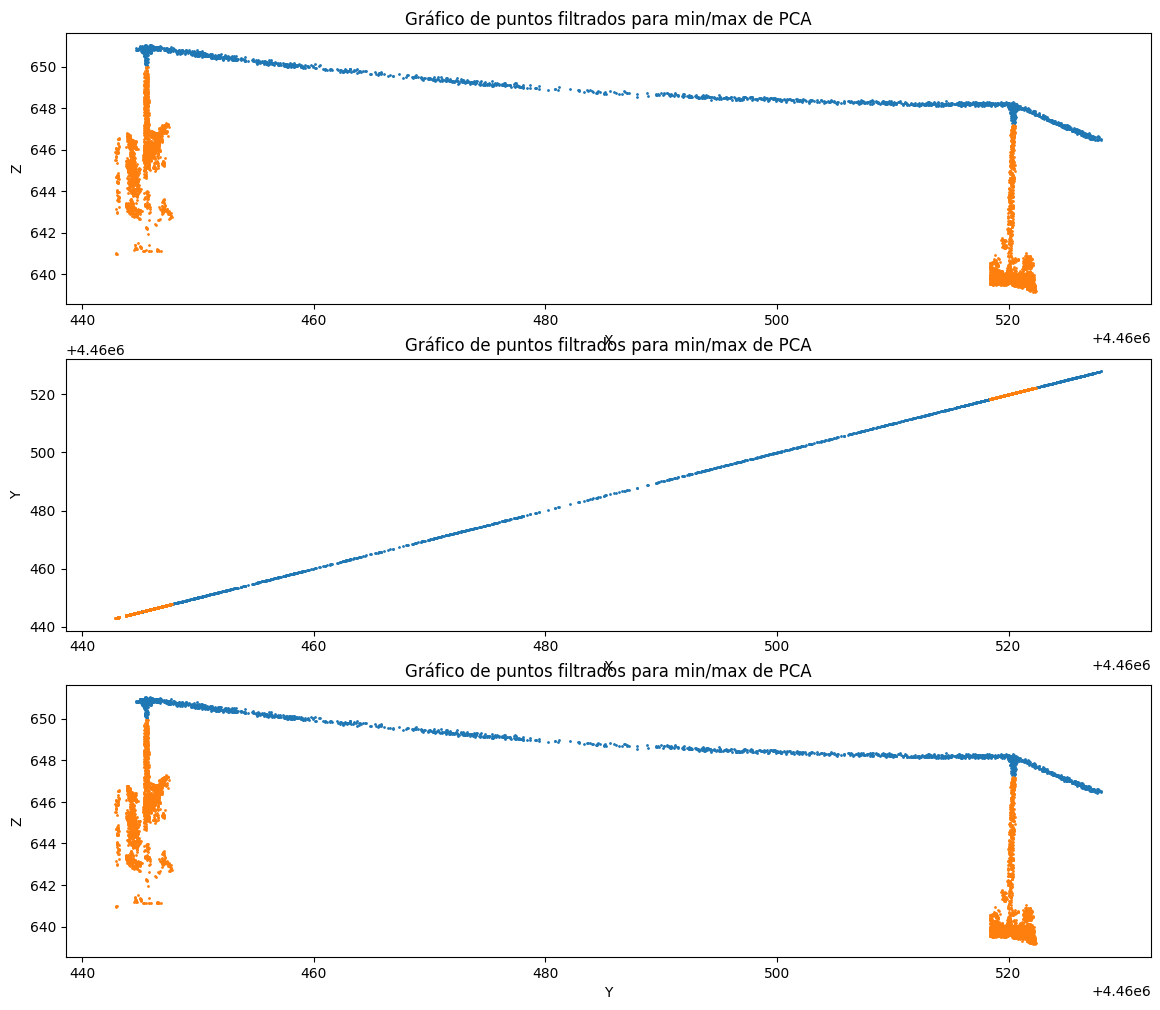

In [ ]:
# Ritorniamo anche i valori minimo e massimo lungo l'asse delle y per vedere la dispersione
y_min_cond, y_max_cond = data_2d_pca_cond[:, 1].min(), data_2d_pca_cond[:, 1].max()
# Ritorniamo anche i valori minimo e massimo lungo l'asse delle y per vedere la dispersione
y_min_apo, y_max_apo = data_2d_pca_apo[:, 1].min(), data_2d_pca_apo[:, 1].max()

# Genera l'array booleano per l'indicizzazione
filtered_indices = (data_2d_pca_cond[:, 1] > y_min_cond) & (data_2d_pca_cond[:, 1] < y_max_cond)

# Filtra x_vals e y_vals usando l'array booleano
x_filtered_conductores, y_filtered_conductores, z_filtered_conductores = x_vals_conductores[filtered_indices], y_vals_conductores[filtered_indices], z_vals_conductores[filtered_indices]

filtered_indices = (data_2d_pca_apo[:, 1] > y_min_apo) & (data_2d_pca_apo[:, 1] < y_max_apo)

# Filtra x_vals e y_vals usando l'array booleano
x_filtered_apoyos, y_filtered_apoyos, z_filtered_apoyos = x_vals_apoyos[filtered_indices], y_vals_apoyos[filtered_indices], z_vals_apoyos[filtered_indices]

# Ora puoi visualizzare i punti filtrati
plt.figure(figsize=(14, 12))

plt.subplot(311)
plt.scatter(y_filtered_conductores, z_filtered_conductores, s=1)
plt.scatter(y_filtered_apoyos, z_filtered_apoyos, s=1)
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Gráfico de puntos filtrados para min/max de PCA')

plt.subplot(312)
plt.scatter(y_filtered_conductores, y_filtered_conductores, s=1)
plt.scatter(y_filtered_apoyos, y_filtered_apoyos, s=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de puntos filtrados para min/max de PCA')

plt.subplot(313)
plt.scatter(y_filtered_conductores, z_filtered_conductores, s=1)
plt.scatter(y_filtered_apoyos, z_filtered_apoyos, s=1)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Gráfico de puntos filtrados para min/max de PCA')

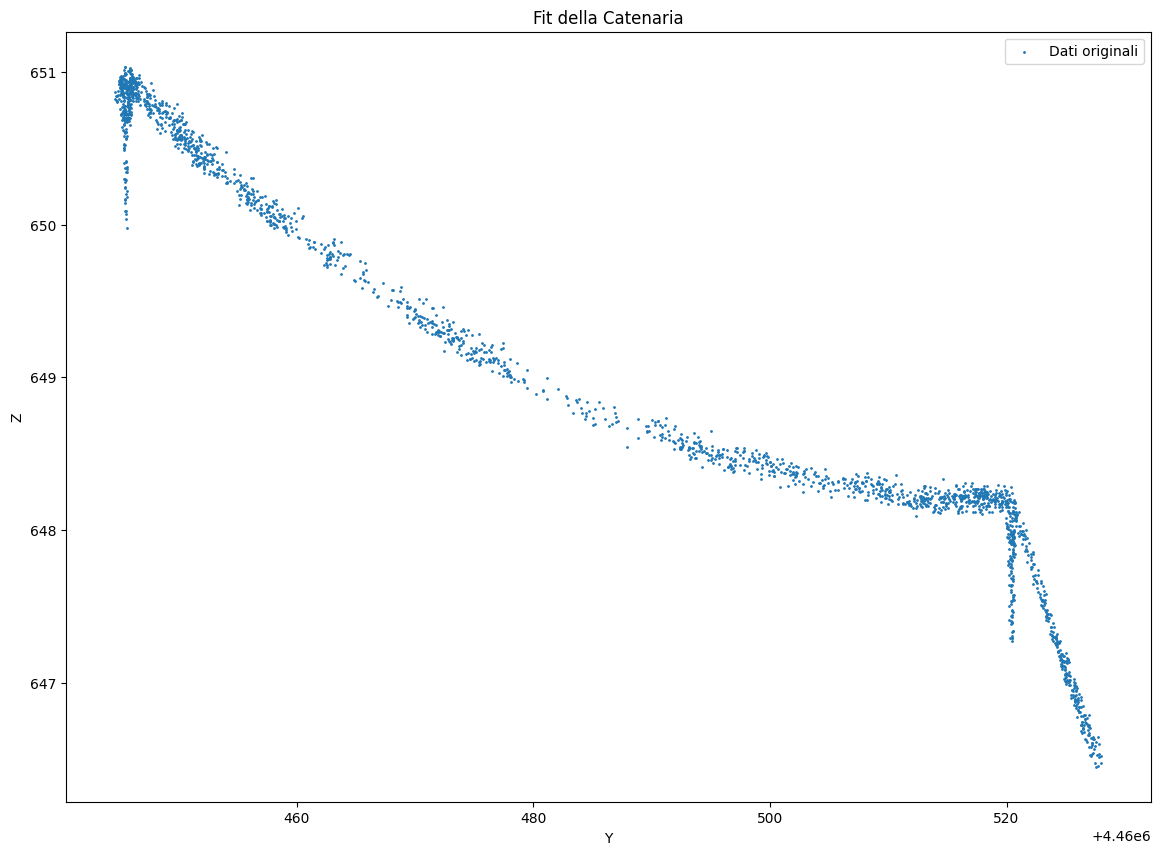

In [ ]:
plt.figure(figsize=(14, 10))
plt.scatter(y_filtered_conductores, z_filtered_conductores, label='Dati originali', s=1)
# plt.plot(y_filtered_conductores, z_filtered_conductores, color='red', label='Catenaria fittata')
plt.xlabel('Y')
plt.ylabel('Z')
plt.legend()
plt.title('Fit della Catenaria')
plt.show()

Text(0.5, 1.0, 'Fit della Catenaria sui Dati Normalizzati')

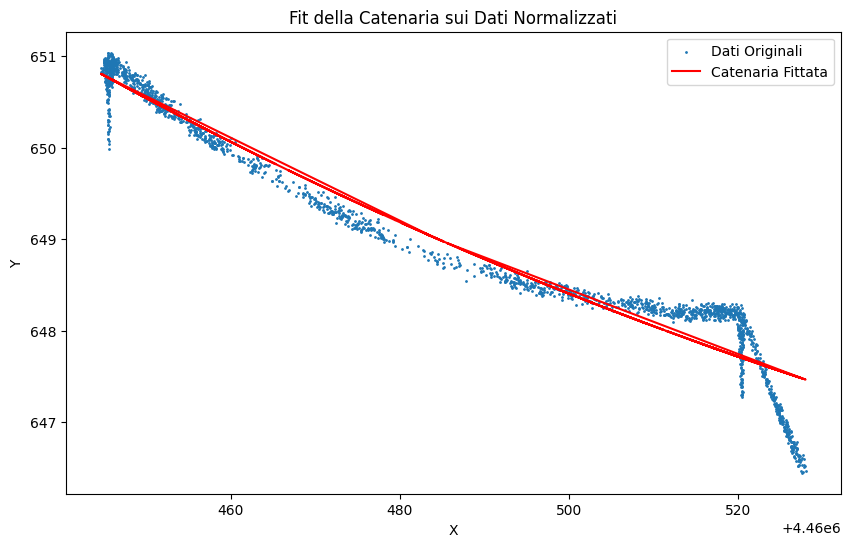

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Definizione della funzione della catenaria
def catenaria(x, a, h, k):
    return a * np.cosh((x - h) / a) + k

# Preparazione dei dati (assumendo che filtered_x_vals e filtered_y_vals siano già definiti)
y_vals = y_filtered_conductores.reshape(-1, 1)  # Reshape per il fitting dello scaler
z_vals = z_filtered_conductores.reshape(-1, 1) 

# Normalizzazione dei valori di x e y
scaler_y = StandardScaler()
scaler_z = StandardScaler()

y_vals_scaled = scaler_y.fit_transform(y_vals).flatten()
z_vals_scaled = scaler_z.fit_transform(z_vals).flatten()  # Flatten per curve_fit

# Parametri iniziali per il fitting
parametri_iniziali = [1, 0, 0]  # a, h, k

# Fitting della catenaria ai dati normalizzati
parametri_ottimizzati, _ = curve_fit(catenaria, y_vals_scaled.flatten(), z_vals_scaled, p0=parametri_iniziali)

# Calcolo dei valori y fittati sui dati normalizzati
fitted_z_vals_scaled = catenaria(y_vals_scaled.flatten(), *parametri_ottimizzati)

# De-normalizzazione dei valori y fittati per il plot
fitted_z_vals = scaler_z.inverse_transform(fitted_z_vals_scaled.reshape(-1, 1)).flatten()

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.scatter(scaler_y.inverse_transform(y_vals_scaled.reshape(-1,1)).flatten(), z_vals, label='Dati Originali', s=1)
plt.plot(scaler_y.inverse_transform(y_vals_scaled.reshape(-1,1)).flatten(), fitted_z_vals, color='red', label='Catenaria Fittata')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Fit della Catenaria sui Dati Normalizzati')

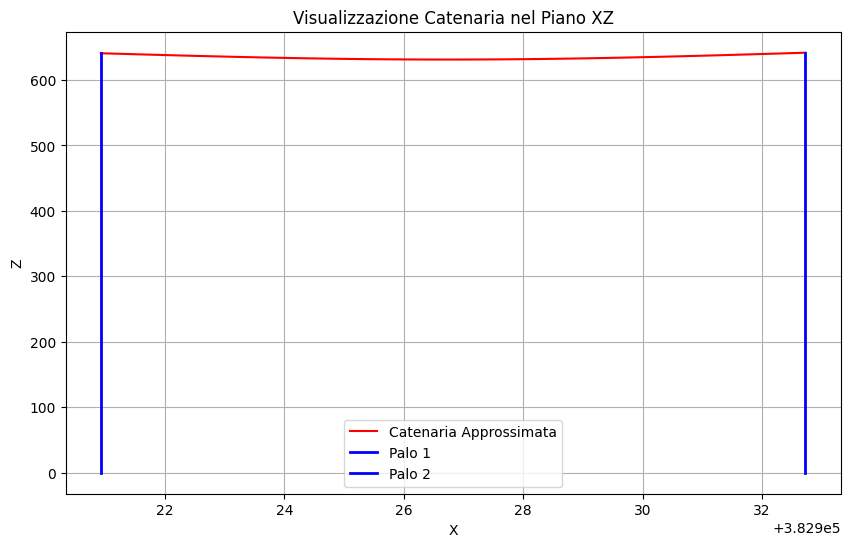

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Coordinate degli apici dei pali e calcolo della catenaria approssimativa come prima
palo1_x, palo1_z = 382920.926, 640.8108999999968
palo2_x, palo2_z = 382932.7259999998, 641.6374000000069

x_vals = np.linspace(palo1_x, palo2_x, 100)
# Assumiamo una semplice interpolazione lineare per z per semplificare
z_vals = np.linspace(palo1_z, palo2_z, 100) - np.cos((x_vals - x_vals.mean()) * np.pi / (x_vals.max() - x_vals.min())) * 10

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(x_vals, z_vals, 'r-', label='Catenaria Approssimata')  # Catenaria
plt.plot([palo1_x, palo1_x], [0, palo1_z], 'b-', lw=2, label='Palo 1')  # Palo 1
plt.plot([palo2_x, palo2_x], [0, palo2_z], 'b-', lw=2, label='Palo 2')  # Palo 2

plt.xlabel('X')
plt.ylabel('Z')
plt.title('Visualizzazione Catenaria nel Piano XZ')
plt.legend()
plt.grid(True)
plt.show()
